<a href="https://colab.research.google.com/github/delafarahita/PCVK_Ganjil_2024/blob/main/Proyek_PCVK_Berdua_Brillianta_Dela.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brilliantna Salsabila / 2241720041

# Dela Farahita Zain    / 2241720058

# **Deteksi Penggunaan Masker Kesehatan pada Wajah**

# Import Folder yang Ada di Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [2]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np

# Menetapkan Path untuk Data Pelatihan
Menentukan lokasi penyimpanan data yang akan digunakan untuk melatih model.

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")

print("Path to dataset files:", path)

100%|██████████| 163M/163M [00:05<00:00, 33.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omkargurav/face-mask-dataset/versions/1


In [4]:
from pathlib import Path

x  = "/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data"
path = Path(x)
path.ls()

(#3) [Path('/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/with_mask'),Path('/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/.ipynb_checkpoints'),Path('/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/without_mask')]

# Memuat data untuk pelatihan
Mengatur dan memuat data pelatihan ke dalam program.

In [5]:
from fastai.vision.all import *
import numpy as np

# Pastikan path sudah benar, menggantikan dengan direktori data yang digunakan
path = Path("/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data")

# Menetapkan seed untuk hasil yang konsisten
np.random.seed(40)

# Mendefinisikan blok data
data_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),      # Menentukan tipe data (gambar dan kategori)
    get_items=get_image_files,               # Mengambil file gambar dari folder
    splitter=RandomSplitter(valid_pct=0.2),  # Membagi data 80% pelatihan, 20% validasi
    get_y=parent_label,                      # Mendapatkan label berdasarkan nama folder induk
    item_tfms=Resize(224),                   # Mengubah ukuran gambar menjadi 224x224
    batch_tfms=aug_transforms(do_flip=True) + [Normalize.from_stats(*imagenet_stats)]  # Augmentasi dan normalisasi
)

# Memuat data dari path yang ditentukan
data = data_block.dataloaders(path, bs=64, num_workers=4)


#  Eksplorasi Data
Melakukan analisis awal untuk memahami struktur dan karakteristik data.

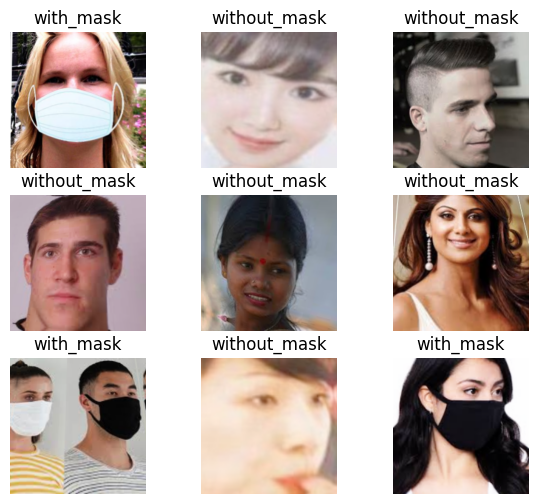

In [6]:
# Menampilkan batch data dengan 3 baris dan ukuran gambar yang ditentukan
data.show_batch(max_n=9, figsize=(7,6))


# Mengecek jumlah data di pelatihan dan validasi

In [7]:
# Menampilkan panjang data pelatihan dan validasi
print(f'Jumlah data pelatihan: {len(data.train)}')
print(f'Jumlah data validasi: {len(data.valid)}')


Jumlah data pelatihan: 69
Jumlah data validasi: 18


# Menampilkan Kelas yang Ada dalam Data
Menampilkan label atau kategori kelas yang ada dalam data pelatihan.

In [8]:
print(data.vocab)  # Menampilkan kelas-kelas yang ada di dataset
print(len(data.vocab))  # Menampilkan jumlah kelas


['with_mask', 'without_mask']
2


In [9]:
# Memuat data dari path yang ditentukan
data = data_block.dataloaders(path, bs=64, num_workers=4)

# Menampilkan output seperti ImageDataBunch
print(f"ImageDataBunch;\n")
print(f"Train: LabelList ({len(data.train.items)} items)")
print(f"x: ImageList")
# Menampilkan beberapa gambar (3 channel, ukuran 224x224)
print(f"Image (3, 224, 224)," * 5)
print(f"y: CategoryList")
# Menampilkan beberapa label dari data pelatihan
print(','.join([str(lbl) for lbl in data.train.dataset.items[:5]]))
print(f"Path: {path};\n")

print(f"Valid: LabelList ({len(data.valid.items)} items)")
print(f"x: ImageList")
# Menampilkan beberapa gambar (3 channel, ukuran 224x224)
print(f"Image (3, 224, 224)," * 5)
print(f"y: CategoryList")
# Menampilkan beberapa label dari data validasi
print(','.join([str(lbl) for lbl in data.valid.dataset.items[:5]]))
print(f"Path: {path};\n")

print(f"Test: None")

ImageDataBunch;

Train: LabelList (4460 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),
y: CategoryList
/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/with_mask/with_mask_1412.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/without_mask/without_mask_3184.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/without_mask/without_mask_1458.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/without_mask/without_mask_883.jpg,/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/without_mask/without_mask_2911.jpg
Path: /content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data;

Valid: LabelList (1114 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),
y: CategoryList
/content/drive/MyDrive/PCVK_Ganjil_2024/Proyek_Brilli-Dela/data/without_mask/without_mask_3546.jpg,/con

# Membuat Model
Membangun arsitektur model untuk deteksi masker wajah.

In [10]:
learn = vision_learner(data, models.resnet50, metrics=[accuracy], model_dir=Path('../kaggle/working'), path=Path("."))


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


# Menemukan Learning Rate (LR)
Mengidentifikasi learning rate yang optimal untuk melatih model.

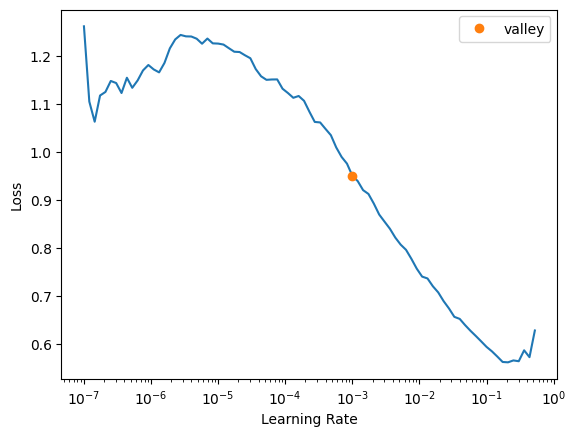

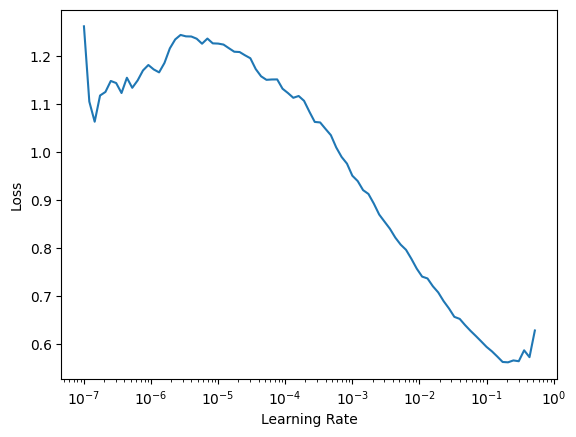

In [13]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

learn.lr_find()
learn.recorder.plot_lr_find()

# Melatih Model
Melakukan proses pelatihan model menggunakan data yang telah dimuat.

In [14]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.463208,0.200446,0.977558,02:27
1,0.386468,0.137461,0.992819,00:46
2,0.199534,0.036583,0.996409,00:46
3,0.079202,0.034037,0.997307,00:48


# Tuning Hyper Parameter
Menyesuaikan parameter model untuk meningkatkan kinerja.

In [15]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.051429,0.044109,0.996409,00:55
1,0.062852,0.047994,0.997307,00:54
2,0.093276,0.049622,0.995512,00:54
3,0.070036,0.018976,0.996409,00:54
4,0.037622,0.035975,0.996409,00:54
5,0.033890,0.043856,0.997307,00:54
6,0.018268,0.262845,0.996409,00:54
7,0.017564,0.044125,0.998205,00:58
8,0.014449,0.044631,0.997307,00:55
9,0.008932,0.045364,0.998205,00:54


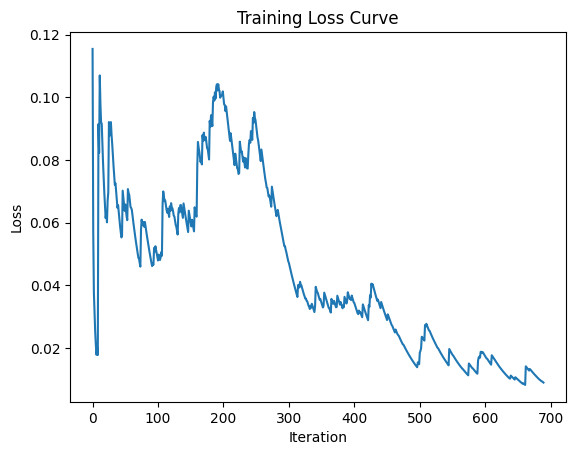

In [17]:
import matplotlib.pyplot as plt

# Plotting training and validation losses
plt.plot(learn.recorder.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()


# Menginterpretasikan Hasil
Mengevaluasi performa model berdasarkan hasil yang diperoleh.

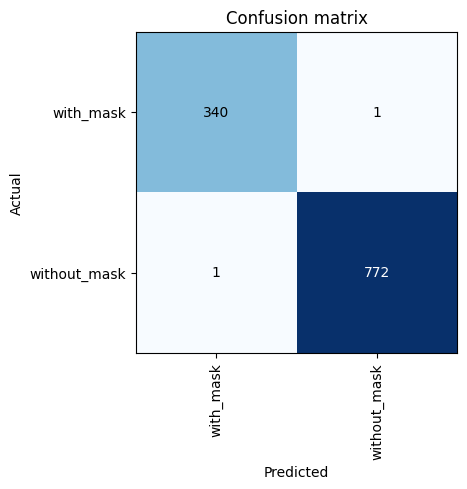

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

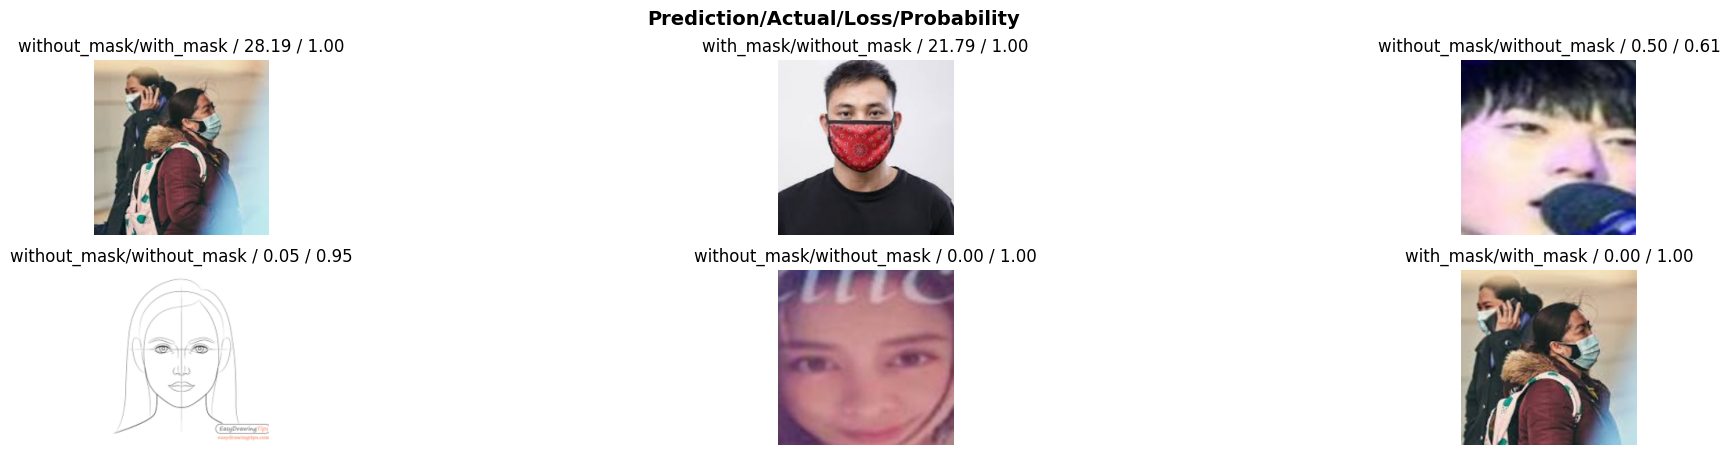

In [19]:
interp.plot_top_losses(6,figsize = (25,5))

# Menyimpan dan Memuat Model
Menyimpan model yang sudah dilatih dan memuatnya kembali untuk penggunaan selanjutnya.

In [22]:
# Mengekspor model ke file 'export.pkl' di direktori '/kaggle/working'
learn.export("/kaggle/working/export.pkl")

# Mengatur direktori untuk menyimpan model
learn.model_dir = "/kaggle/working"

# Menyimpan model dengan nama 'stage-1' tanpa menggunakan 'return_path'
learn.save("stage-1")


Path('/kaggle/working/stage-1.pth')